## **Import libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/gdp.csv")
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## **Analysing All Countries**

<Axes: xlabel='YEARS', ylabel='GDP'>

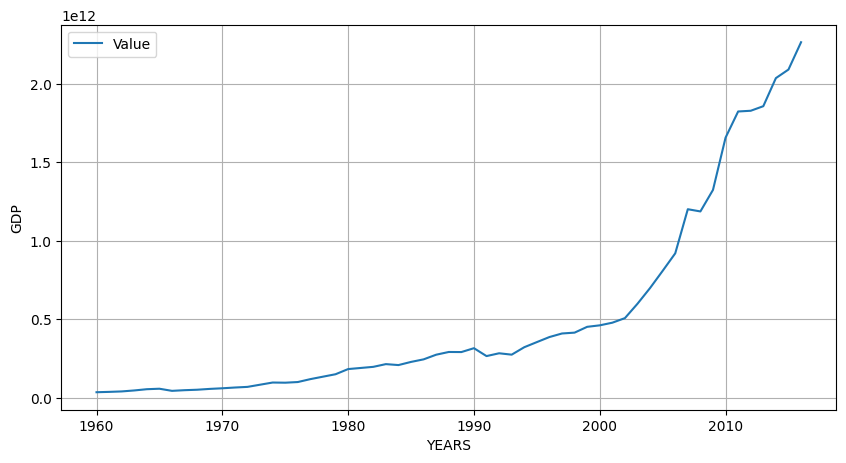

In [ ]:
df_pr = df[df['Country Name'] == 'India']
df_pr.plot(kind = 'line',
           x    = 'Year',
           y    = 'Value',
           legend  = True,
           grid    = True,
           xlabel = 'YEARS',
           ylabel = 'GDP',
           figsize = (10,5))

In [ ]:
# df_pr = df[df['Country Name'] == 'India']

# data = df_pr.values

# gdp_change = [0]

# for i in range(1,len(data)):

#   cur = data[i][3]
#   prev = data[i-1][3]

#   gdp_change.append(round((cur - prev)/prev *100,2))

# df_pr.assign(GDP = gdp_change)

## **Finding GDP In Every Country**

In [ ]:
final_data = []
for country in df['Country Name'].unique():

  df_sr = df[df['Country Name'] == country]

  data = df_sr.values

  gdp_change = [0]

  for i in range(1,len(data)):

    cur = data[i][3]
    prev = data[i-1][3]

    gdp_change.append(round((cur - prev)/prev *100,2))

  df_sr = df_sr.assign(GDP = gdp_change)
  final_data.append(df_sr)

In [ ]:
df = pd.concat(final_data, axis = 0)

In [ ]:
df.groupby('Country Name')['GDP'].mean().sort_values(ascending = False)

,GDP
Country Name,
Cayman Islands,108.380000
Equatorial Guinea,22.312453
Nauru,20.650000
Iraq,18.075854
Oman,17.681154
...,...
Barbados,3.109259
San Marino,2.148333
American Samoa,1.937333


In [ ]:
# 1964 - 2576
# 1969 - 2843
# 1970 - 3138

In [ ]:
round(((2843 - 2576) / 2576 * 100),2)

10.36

In [ ]:
import plotly.express as px
import plotly.offline as pyo

In [ ]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [ ]:
df_pr = df[df['Country Name'] == 'World']
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')
fig

In [ ]:
pyo.plot(fig, filename = 'World GDP')

/usr/local/lib/python3.11/dist-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `World GDP` didn't end with .html. Adding .html to the end of your file.



'World GDP.html'

In [ ]:
df_pr = df[df['Country Name'] == 'India']
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'India GDP Analysis')
fig

In [ ]:
pyo.plot(fig, filename = 'India GDP.html')

'India GDP.html'

In [ ]:
df_pr = df[df['Country Name'] == 'Italy']
px.line(df_pr, x = 'Year', y = 'Value', title = 'Italy GDP Analysis')

## **GDP Of Each Country**

In [ ]:
os.mkdir("GDP Individuals")
for country in df['Country Name'].unique():
  df_pr = df[df['Country Name'] == country]
  fig = px.line(df_pr, x = 'Year', y = 'Value', title = country + ' GDP Analysis')
  pyo.plot(fig, filename = 'GDP Individuals/' + country + '.html', auto_open = False)

## **GDP Of All Countries**

In [ ]:
fig = px.line(df, x = 'Year', y = 'Value', color = 'Country Name', title = 'GDP Of All Countries')
pyo.plot(fig, filename = 'Countries.html')

'Countries.html'

## **Comparison Betweeen Two Countries**

In [ ]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']
df_pr = pd.concat([c1,c2], axis = 0)

In [ ]:
df_pr

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


In [ ]:
fig = px.line(df_pr, x = 'Year', y = 'Value', color = 'Country Name', title = 'Analysis Between India And China')
pyo.plot(fig, filename = 'Comparison.html')

'Comparison.html'

## **GDP Comparison Between Specific Countries**

In [ ]:
lst = ['ITA', 'IND', 'USA', 'CHN']
dfs = []
for i in lst:
  dfs.append(df[df['Country Code'] == i])
  dfs_pr = pd.concat(dfs, axis = 0)

In [ ]:
dfs_pr['Country Name'].unique()

array(['Italy', 'India', 'United States', 'China'], dtype=object)

In [ ]:
fig = px.line(dfs_pr, x = 'Year', y = 'Value', color = 'Country Name', title = 'GDP Comparison Between ' + (' |').join(lst))
pyo.plot(fig,filename = 'Specific Countries.html')

'Specific Countries.html'

In [ ]:
('|').join(lst)

'ITA|IND|USA|CHN'

In [ ]:

def countries(lst, isopen):
  dfs = []
  for i in lst:
    dfs.append(df[df['Country Code'] == i])
    dfs_pr = pd.concat(dfs, axis = 0)
  fig = px.line(dfs_pr, x = 'Year', y = 'Value', color = 'Country Name', title = 'GDP Comparison Between ' + (' |').join(lst))
  pyo.plot(fig, filename = 'Specific Countries.html', auto_open = isopen)
countries(['ITA', 'IND', 'USA', 'CHN'], False)

## **GDP Comparison Between Countires**

In [ ]:
def countries(lst, isopen):
  dfs = []
  for i in lst:
    dfs.append(df[df['Country Code'] == i])
    dfs_pr = pd.concat(dfs, axis = 0)
  fig = px.line(dfs_pr, x = 'Year', y = 'GDP', color = 'Country Name', title = 'GDP Comparison Between ' + (' |').join(lst))
  pyo.plot(fig, filename = 'GDP Comparison.html', auto_open = isopen)
countries(['IND', 'USA'], False)

In [ ]:
2016 - 57

1959

In [ ]:
dfs = []
for country_name in df['Country Name'].unique():
  dfs_pr = df[df['Country Name'] == country_name]
  if len(dfs_pr) == 57:
    dfs.append(dfs_pr)
df_pr = pd.concat(dfs, axis = 0)


In [ ]:
df_pr['Country Name'].nunique()

120

In [ ]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', color = 'Country Name', title = 'GDP Growth')
pyo.plot(fig, filename = 'GDP Growth Analysis.html')

'GDP Growth Analysis.html'

56